In [1]:
import os
import requests 
import time
import string
import networkx as nx
import itertools
import networkx as nx
import pandas as pd
import json
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

from nltk.corpus import wordnet as wn #importing it
from nltk.stem.wordnet import WordNetLemmatizer #importing wordnet lemmatizer
from nltk import pos_tag #part-of-speech-tagger
from collections import defaultdict #defaultdict returns default value for non-existant keys you try to  access based on the function you passed in the constructor
#from google.colab import files

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ftrole/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# creation file all_tweets

In [2]:
china= pd.read_csv("../data/all_keys_aggregation/4.countries/China.csv",dtype ={"id_str": str})
america = pd.read_csv("../data/all_keys_aggregation/4.countries/USA.csv",dtype ={"id_str": str})

/home/ftrole/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import json
import re
'''

def extract_text(df):     # extract the text from the tweets
    list_strings = []
    i=0
    for index in range(len(df)):
        string = (df.loc[index]['extended_tweet'])
    
        if type(string) == str :
            if re.search(':(.+?)https',string):
                ss = re.search(':(.+?)https',string).group(1)
            list_strings.append(ss)

        else:

            list_strings.append(df.loc[index]['text'])
        i=i+1

    return list_strings
'''


def extract_text(df):       #extract the text from the tweets and RT
                            #works ONLY on .csv file
    list_strings = []
    for index in range(len(df)):
        #print(index)
        text = df.loc[index]['text']                          #if it is nor trucated nor a RT  i take "text"
        string = -1
        if (df.loc[index,"truncated"] == True):                 #if it is trucated I take "extended_tweet"
            string = df.loc[index,"extended_tweet"]
        if type(df.loc[index,"retweeted_status"]) != float:     #if it is a RT I take retweeted_status
            string = df.loc[index,"retweeted_status"]
        if type(string) == str :
            if(re.search('full_text\':(.+?)https',string) != None):     #if I find "full_text"
                s = re.search('full_text\':(.+?)https',string).group(1)
            if(re.search('text\':(.+?)https',string)!= None):
                s = re.search('text\':(.+?)https',string).group(1)
            else:  #here then one should remove the http
                if (re.search('full_text\':\s\'(.+?)\'',string)!=None) :
                    s=re.search('full_text\':\s\'(.+?)\'',string).group(1)  
                if (re.search('\{\\\'full_text\\\':\s(.+?)\"',string)!=None) : 
                    re.search('\{\\\'full_text\\\':\s(.+?)\"',string).group(1)
            
            list_strings.append(s)
            #print(s)         
        else:
            list_strings.append(text)
            print(text)
      

    return list_strings

In [4]:
china_text = extract_text(china)

China, ASEAN reach consensuses on jointly fighting virus outbreak: Foreign Ministry https://t.co/aocyKPrDjQ
New Development Bank may provide emergency funding for #China to fight #COVID19 https://t.co/AKrgqAdQfG
#China's imports, exports, foreign capital affected by coronavirus outbreak #COVID19  https://t.co/28s60RsUkJ
26 provinces in #China resume inter-provincial transport services https://t.co/rIaEngjPt7
More foreign #visa centers in #China to reopen on February 24 https://t.co/F9QNXOdCu7
Live: China's State Council Information Office briefs media on implementation of #COVID19 prevention #coronavirus https://t.co/wprm7VqHwg
Tibetan areas in SW China's Sichuan declared out of poverty 

more: https://t.co/0OIa3YpEdk https://t.co/ku8wvp3kJD
Red-crested pochards wintering with swans in NW #China https://t.co/oRCKz4x1XZ https://t.co/goJuErrsjz
Opinion: Emergency China-ASEAN #COVID19 meeting: More than a solidarity show #CGTNFirstVoice https://t.co/GwVXfvF7Vr
Hungarian students cheer for

In [5]:
len(china_text)

9350

In [6]:
china["extended"] = china_text

In [7]:
USA_text = extract_text(america)

China coronavirus outbreak: All the latest updates https://t.co/MBfhIxP4a8
China expels foreign journalists as coronavirus deaths climb https://t.co/HXvN75BwhQ
China coronavirus outbreak: All the latest updates https://t.co/CDeMn5xL4M
Cheating death: China's Wuhan coronavirus survivors recall ordeal https://t.co/GjVKrFagzs
China coronavirus outbreak: All the latest updates https://t.co/nMVwubSNF8
China coronavirus outbreak: All the latest updates https://t.co/xAvNsURWdm
Millions under lockdown in China's Wuhan — in pictures https://t.co/MmlSCu9ss0 | #coronavirus https://t.co/3sewBBmhSL
#Coronavirus latest figures from China's National Health Commission https://t.co/LjHaRANKrX https://t.co/wdAQWH2Der
China coronavirus outbreak: All the latest updates https://t.co/zKf5s5gtRM
China's Hubei province bans vehicle traffic to curb spread of #coronavirus | https://t.co/meDhOBBTxI https://t.co/RseeMWf31i
China coronavirus outbreak: All the latest updates https://t.co/q0drVTui5t
New #coronavirus

In [8]:
USA_text[7]

" 'China revokes press credentials of three at Wall Street Journal over coronavirus opinion piece the gov’t deemed to be ‘racist’.\\n\\nFollow the latest on #COVID19: "

In [9]:
america["extended"] = USA_text
all_tweets = america.append( china)
all_tweets

created_at                   id  \
0     Fri Feb 21 10:50:29 +0000 2020  1230806996087169024   
1     Fri Feb 21 06:07:11 +0000 2020  1230735700745539590   
2     Fri Feb 21 00:15:25 +0000 2020  1230647176990253061   
3     Thu Feb 20 06:15:29 +0000 2020  1230375401874169866   
4     Thu Feb 20 00:45:33 +0000 2020  1230292370027163649   
...                              ...                  ...   
9345  Wed Mar 17 12:23:13 +0000 2021  1372161599176200198   
9346  Wed Mar 17 12:10:57 +0000 2021  1372158510683725824   
9347  Wed Mar 17 11:30:31 +0000 2021  1372148338842169346   
9348  Wed Mar 17 06:55:35 +0000 2021  1372079148584169481   
9349  Wed Mar 17 05:56:40 +0000 2021  1372064322671669248   

                   id_str                                               text  \
0     1230806996087169024  'Shameful'\n\nUkrainians attack a bus carrying...   
1     1230735700745539590  RT @AJENews: China's Hubei says 220 people fro...   
2     1230647176990253061  China coronavirus outbreak: All the latest upd...   
3     1230375401874169866  China expels foreign journalists as coronaviru...   
4     1230292370027163649  China coronavirus outbreak: All the latest upd...   
...                   ...                                                ...   
9345  1372161599176200198  China has approved the emergency use of a self...   
9346  1372158510683725824  As Fawziya Abikar Nur, Minister of Health and ...   
9347  1372148338842169346  Another Chinese #COVID19 vaccine obtained emer...   
9348  1372079148584169481  LIVE: Pakistan begins vaccinating its citizens...   
9349  1372064322671669248  #HeadlinesWatch: SCMP https://t.co/J15SRgQ5HM\...   

     display_text_range                                             source  \
0              [0, 140]  <a href="https://about.twitter.com/products/tw...   
1                   NaN  <a href="http://twitter.com/download/iphone" r...   
2                   NaN  <a href="https://trueanthem.com/" rel="nofollo...   
3                   NaN  <a href="https://trueanthem.com/" rel="nofollo...   
4                   NaN  <a href="https://trueanthem.com/" rel="nofollo...   
...                 ...                                                ...   
9345           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   
9346           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   
9347           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   
9348                NaN  <a href="https://periscope.tv" rel="nofollow">...   
9349           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   

      truncated  in_reply_to_status_id  in_reply_to_status_id_str  \
0          True           1.230779e+18               1.230779e+18   
1         False                    NaN                        NaN   
2         False                    NaN                        NaN   
3         False                    NaN                        NaN   
4         False                    NaN                        NaN   
...         ...                    ...                        ...   
9345       True                    NaN                        NaN   
9346       True                    NaN                        NaN   
9347       True                    NaN                        NaN   
9348       True                    NaN                        NaN   
9349       True                    NaN                        NaN   

      in_reply_to_user_id  ...  \
0               4970411.0  ...   
1                     NaN  ...   
2                     NaN  ...   
3                     NaN  ...   
4                     NaN  ...   
...                   ...  ...   
9345                  NaN  ...   
9346                  NaN  ...   
9347                  NaN  ...   
9348                  NaN  ...   
9349                  NaN  ...   

                                       retweeted_status extended_entities  \
0                                                   NaN               NaN   
1  

In [10]:
all_tweets.drop_duplicates(subset='id',inplace=True)
all_tweets

created_at                   id  \
0     Fri Feb 21 10:50:29 +0000 2020  1230806996087169024   
1     Fri Feb 21 06:07:11 +0000 2020  1230735700745539590   
2     Fri Feb 21 00:15:25 +0000 2020  1230647176990253061   
3     Thu Feb 20 06:15:29 +0000 2020  1230375401874169866   
4     Thu Feb 20 00:45:33 +0000 2020  1230292370027163649   
...                              ...                  ...   
9340  Thu Mar 18 11:50:51 +0000 2021  1372515843955851264   
9341  Thu Mar 18 11:01:40 +0000 2021  1372503462601129991   
9346  Wed Mar 17 12:10:57 +0000 2021  1372158510683725824   
9347  Wed Mar 17 11:30:31 +0000 2021  1372148338842169346   
9349  Wed Mar 17 05:56:40 +0000 2021  1372064322671669248   

                   id_str                                               text  \
0     1230806996087169024  'Shameful'\n\nUkrainians attack a bus carrying...   
1     1230735700745539590  RT @AJENews: China's Hubei says 220 people fro...   
2     1230647176990253061  China coronavirus outbreak: All the latest upd...   
3     1230375401874169866  China expels foreign journalists as coronaviru...   
4     1230292370027163649  China coronavirus outbreak: All the latest upd...   
...                   ...                                                ...   
9340  1372515843955851264  Tap https://t.co/aSutOvQ62X for Asia-Pacific #...   
9341  1372503462601129991  Namibia will launch its #COVID19 vaccination c...   
9346  1372158510683725824  As Fawziya Abikar Nur, Minister of Health and ...   
9347  1372148338842169346  Another Chinese #COVID19 vaccine obtained emer...   
9349  1372064322671669248  #HeadlinesWatch: SCMP https://t.co/J15SRgQ5HM\...   

     display_text_range                                             source  \
0              [0, 140]  <a href="https://about.twitter.com/products/tw...   
1                   NaN  <a href="http://twitter.com/download/iphone" r...   
2                   NaN  <a href="https://trueanthem.com/" rel="nofollo...   
3                   NaN  <a href="https://trueanthem.com/" rel="nofollo...   
4                   NaN  <a href="https://trueanthem.com/" rel="nofollo...   
...                 ...                                                ...   
9340           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   
9341           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   
9346           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   
9347           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   
9349           [0, 140]  <a href="http://static.cms.xinhua-news.cn/sm/t...   

      truncated  in_reply_to_status_id  in_reply_to_status_id_str  \
0          True           1.230779e+18               1.230779e+18   
1         False                    NaN                        NaN   
2         False                    NaN                        NaN   
3         False                    NaN                        NaN   
4         False                    NaN                        NaN   
...         ...                    ...                        ...   
9340       True                    NaN                        NaN   
9341       True                    NaN                        NaN   
9346       True                    NaN                        NaN   
9347       True                    NaN                        NaN   
9349       True                    NaN                        NaN   

      in_reply_to_user_id  ...  \
0               4970411.0  ...   
1                     NaN  ...   
2                     NaN  ...   
3                     NaN  ...   
4                     NaN  ...   
...                   ...  ...   
9340                  NaN  ...   
9341                  NaN  ...   
9346                  NaN  ...   
9347                  NaN  ...   
9349                  NaN  ...   

                                       retweeted_status extended_entities  \
0                                                   NaN               NaN   
1  

In [11]:
 #select id_str and texts and save
import csv
all_tweets=all_tweets[['id_str','extended']]
#all_tweets.to_csv('../LIWK_files/all_tweets.csv',index=False, quoting=csv.QUOTE_NONNUMERIC) # here the quoting is to avoid index approximation

# division per country and periods

In [12]:
## start by dividing the liwk files by country and time periods.

#read files
pdLIWK = pd.read_excel('../LIWK_files/LIWC2015 Results (all_tweets).xlsx', engine='openpyxl',dtype ={"Source (A)": str})
pd_indexes= pd.read_csv('../LIWK_files/all_tweets.csv',dtype ={"id_str": str})

china1= pd.read_csv("../data/all_keys_aggregation/3.countries+periods/China_JanFeb2020.csv",dtype ={"id_str": str})
china2 = pd.read_csv("../data/all_keys_aggregation/3.countries+periods/China_SeptOct2020.csv",dtype ={"id_str": str})
china3= pd.read_csv("../data/all_keys_aggregation/3.countries+periods/China_MarchApril2021.csv",dtype ={"id_str": str})

america1= pd.read_csv("../data/all_keys_aggregation/3.countries+periods/USA_JanFeb2020.csv",dtype ={"id_str": str})
america2 = pd.read_csv("../data/all_keys_aggregation/3.countries+periods/USA_SeptOct2020.csv",dtype ={"id_str": str})
america3= pd.read_csv("../data/all_keys_aggregation/3.countries+periods/USA_MarchApril2021.csv",dtype ={"id_str": str})

#pdLIWK.to_csv("../LIWK_files/LIWK_results_full.csv")  #save to csv

#pdLIWK["Source (A)"] = [ pdLIWK["Source (A)"][i][:-5] for i in range(len(pdLIWK))]

/home/ftrole/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


The indexes of the tweets are distorted in the excel file, so I change it back with the original one :

In [13]:
#get index of the tweets 
print(pdLIWK[["Source (A)","Source (B)"]][0:10])
print(pd_indexes[["id_str","extended"]][0:10])
pdLIWK["Source (A)"] = pd_indexes["id_str"]
#pdLIWK[pdLIWK["Source (A)"].isin(america["id_str"])] 


            Source (A)                                         Source (B)
0  1230806996087160060   "'Shameful'\n\nUkrainians attack a bus carryi...
1  1230735700745530110  RT @AJENews: China's Hubei says 220 people fro...
2  1230647176990249980  China coronavirus outbreak: All the latest upd...
3  1230375401874160130  China expels foreign journalists as coronaviru...
4  1230292370027160060  China coronavirus outbreak: All the latest upd...
5  1230164648009309950   'At least 2,004 people in mainland China have...
6  1230136882861949950  RT @AJENews: UN AIDS agency warns that HIV pat...
7  1230056202807180030   'China revokes press credentials of three at ...
8  1230054445251160060   'As of February 19, there were at least 14,00...
9  1230046864700950020   "There's concern over China's mass surveillan...
                id_str                                           extended
0  1230806996087169024   "'Shameful'\n\nUkrainians attack a bus carryi...
1  1230735700745539590  RT @AJENews: C

In [14]:
print("china unique tweets",len(np.unique(china["id_str"]) ) )
print("america unique tweets",len(np.unique(america["id_str"]) ) )

china unique tweets 7070
america unique tweets 14123


## save the sub df of the result in new files

In [15]:

america1L=pdLIWK[pdLIWK["Source (A)"].isin(america1["id_str"])] 
america2L=pdLIWK[pdLIWK["Source (A)"].isin(america2["id_str"])] 
america3L=pdLIWK[pdLIWK["Source (A)"].isin(america3["id_str"])] 

americaTL=pdLIWK[pdLIWK["Source (A)"].isin(america["id_str"])] 

china1L=pdLIWK[pdLIWK["Source (A)"].isin(china1["id_str"])] 
china2L=pdLIWK[pdLIWK["Source (A)"].isin(china2["id_str"])] 
china3L=pdLIWK[pdLIWK["Source (A)"].isin(china3["id_str"])] 

chinaTL=pdLIWK[pdLIWK["Source (A)"].isin(china["id_str"])] 
'''
path="../LIWK_files/"

america1L.to_csv(path+'USA_JanFeb2020L.csv',index=False)
america2L.to_csv(path+'USA_SeptOct2020L.csv',index=False)
america3L.to_csv(path+'USA_MarchApril2021L.csv',index=False)

americaTL.to_csv(path+'USAL.csv',index=False)


china1L.to_csv(path+'China_JanFeb2020L.csv',index=False)
china2L.to_csv(path+'China_SeptOct2020L.csv',index=False)
china3L.to_csv(path+'China_MarchApril2021L.csv',index=False)

chinaTL.to_csv(path+'ChinaL.csv',index=False)
'''

'\npath="../LIWK_files/"\n\namerica1L.to_csv(path+\'USA_JanFeb2020L.csv\',index=False)\namerica2L.to_csv(path+\'USA_SeptOct2020L.csv\',index=False)\namerica3L.to_csv(path+\'USA_MarchApril2021L.csv\',index=False)\n\namericaTL.to_csv(path+\'USAL.csv\',index=False)\n\n\nchina1L.to_csv(path+\'China_JanFeb2020L.csv\',index=False)\nchina2L.to_csv(path+\'China_SeptOct2020L.csv\',index=False)\nchina3L.to_csv(path+\'China_MarchApril2021L.csv\',index=False)\n\nchinaTL.to_csv(path+\'ChinaL.csv\',index=False)\n'

## Marker statistics

In [18]:
# china vs america
print( "china:\n ",chinaTL.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ])
print("\n USA:\n ", americaTL.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ] )

china:
  Authentic       30.486317
they             0.254320
anger            0.622583
negemo           1.255014
posemo           1.756960
death            0.464526
focuspresent     4.848102
focuspast        1.662349
focusfuture      0.568935
affiliation      1.151199
drives           6.352330
achieve          1.577436
power            3.240805
Clout           63.048562
dtype: float64

 USA:
  Authentic       19.974209
they             0.192205
anger            0.354752
negemo           1.421195
posemo           1.093763
death            0.484045
focuspresent     4.096640
focuspast        1.432546
focusfuture      0.639095
affiliation      0.890278
drives           5.987298
achieve          1.198963
power            3.115900
Clout           60.597217
dtype: float64


/tmp/ipykernel_4271/706047348.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print( "china:\n ",chinaTL.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ])
/tmp/ipykernel_4271/706047348.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\n USA:\n ", americaTL.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ] )


In [19]:
# china1 vs america1
print( "china:\n ",china1L.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ])
print("\n USA:\n ", america1L.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ] )

/tmp/ipykernel_4271/1737714826.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print( "china:\n ",china1L.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ])


china:
  Authentic       25.677896
they             0.310516
anger            0.989034
negemo           1.651398
posemo           1.754118
death            0.662380
focuspresent     4.991864
focuspast        1.513562
focusfuture      0.528011
affiliation      1.298543
drives           6.393396
achieve          1.593327
power            3.281051
Clout           64.199412
dtype: float64

 USA:
  Authentic       21.110105
they             0.154422
anger            0.358274
negemo           1.464902
posemo           0.703567
death            0.665938
focuspresent     3.894332
focuspast        1.251813
focusfuture      0.465563
affiliation      0.776728
drives           4.842934
achieve          1.027110
power            2.441918
Clout           59.462947
dtype: float64


/tmp/ipykernel_4271/1737714826.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\n USA:\n ", america1L.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ] )


In [20]:
# china2 vs america2
print( "china:\n ",china2L.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ])
print("\n USA:\n ", america2L.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ] )

/tmp/ipykernel_4271/1090959135.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print( "china:\n ",china2L.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ])


china:
  Authentic       35.335442
they             0.206493
anger            0.362950
negemo           0.934240
posemo           2.023096
death            0.297358
focuspresent     4.833598
focuspast        1.746438
focusfuture      0.633624
affiliation      1.132041
drives           6.548743
achieve          1.637842
power            3.292451
Clout           62.420018
dtype: float64

 USA:
  Authentic       19.808192
they             0.204374
anger            0.376511
negemo           1.412920
posemo           1.400278
death            0.372249
focuspresent     4.206582
focuspast        1.642479
focusfuture      0.739519
affiliation      0.961504
drives           6.808985
achieve          1.323253
power            3.671020
Clout           61.470446
dtype: float64


/tmp/ipykernel_4271/1090959135.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\n USA:\n ", america2L.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ] )


In [21]:

# china3 vs america3
print( "china:\n ",china3L.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ])
print("\n USA:\n ", america3L.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ] )

china:
  Authentic       32.362143
they             0.211277
anger            0.217183
negemo           0.911846
posemo           1.129493
death            0.310079
focuspresent     4.480499
focuspast        1.877874
focusfuture      0.528985
affiliation      0.784689
drives           5.768478
achieve          1.388749
power            3.004891
Clout           61.329291
dtype: float64

 USA:
  Authentic       18.687811
they             0.222035
anger            0.307338
negemo           1.375377
posemo           1.049264
death            0.444181
focuspresent     4.169054
focuspast        1.279440
focusfuture      0.689280
affiliation      0.912369
drives           6.007406
achieve          1.200238
power            2.988970
Clout           60.502529
dtype: float64


/tmp/ipykernel_4271/2811163121.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print( "china:\n ",china3L.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ])
/tmp/ipykernel_4271/2811163121.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\n USA:\n ", america3L.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power", "Clout"] ] )


### Few thoughts
The value of the marker 'Authentic' is the only main difference

## Dummy projections---(actually no projectio!!) (simple average and sum)

In [22]:
from wordcloud import WordCloud
def plot_wordcloud(dictionary):
    wordcloud = WordCloud(background_color='white',
                          width=1500,
                          height=1000
                          ).generate_from_frequencies(dictionary)
    # use .generate(space_separated_string) - to generate cloud from text

    plt.figure(figsize=(9,6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [23]:
# functions from NS_word_meas
def cleaner(tweet,word_list = stopwords.words('english')):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove mentions
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # remove hashtags
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # remove http links
    tweet = " ".join(tweet.split())
    tweet = str.lower(tweet) #to lowercase
    table = str.maketrans(dict.fromkeys(string.punctuation)) 
    tweet = tweet.translate(table)# remove punctuation

    special_characters = ['rt','dr','“','rt','the','to','of','a','an','on','has','have','had','is','was','did','n','et','ha','lt','1','2','5']

    tweet = tweet.split()      
    tweet = ' '.join([ word for word in tweet if word not in word_list and word not in special_characters  ])   #remove useless words
    return tweet



#initialize an empty dict

def frequency_marker_dictionary(df,df2,markstring):   ##dummy marker assignment
    mark_words = {}
    count_words = {}
    i=0
    for row in df:
        for word in row.split():
            #if the word is encountered for the first time add to dict as key and set its value to 0
            mark_words.setdefault(word, 0)
            count_words.setdefault(word, 0)
            #increase the value of a word by the average of the previous values and the new one tweet value
            mark_words[word] = mark_words[word] + df2.iloc[i][markstring]  
            count_words[word] += 1
        i+=1
    return mark_words, count_words

In [24]:
# this is the code provided by Lejla for cleaning, lemmatising and pos tagging tweets

nltk.download('words')
words = set(nltk.corpus.words.words()) #the last two lines serve to download the corpus of standard English language words
nltk.download('stopwords') #downloading stopwords
stop_words = set(nltk.corpus.stopwords.words("english")) #taking the stop words from English language
nltk.download('wordnet') #downloading wordnet
from nltk.corpus import wordnet as wn #importing it
from nltk.stem.wordnet import WordNetLemmatizer #importing wordnet lemmatizer
from nltk import pos_tag #part-of-speech-tagger
nltk.download('averaged_perceptron_tagger') #downloading tagger
from collections import defaultdict #defaultdict returns default value for non-existant keys you try to  access based on the function you passed in the constructor
tag_map = defaultdict(lambda : wn.NOUN) #here we define that wn.NOUN is the default value for the dict
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

def lemma_pos_cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove mentions
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # remove hashtags
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # remove http links
    tweet = " ".join(tweet.split())
    tweet = str.lower(tweet) #to lowercase
    tweet = re.sub("'", " ", tweet)  # remove aphostrophe

    #basically we use pos_tag function on tokens that we get by applying wordpunct tokenization
    #to tweet (it separates all the words and symbols)
    #then we pass the token along with it's wordnet pos value that we get from the tag_map dictionary (noun, adjective, verb or adverb) to the lemma function (the WordNetLemmatizer())
    lemma_function = WordNetLemmatizer()
    tweet = " ".join(lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in nltk.pos_tag(nltk.wordpunct_tokenize(tweet))) #lemmatize

    # francesco: I removed also all 2 letters words and added specific words, words that appears frequently but are discarded because they are not in the english language and len(w)>2
    specific_words=['virus', 'coronavirus', 'covid19', 'covid', 'trump', 'hubei', 'beijing', 'xinjiang', 'jinping', 'korea', 'xinhua', 'india', 'taiwan','johnson','singapore', 'africa', 'japanese', 'france', 'asian', 'australia', 'french', 'asia', 'leishenshan', 'british', 'qingdao', 'fauci', 'america',  'california', 'sichuan', 'malaysia', 'huawei','thailand', 'shandong', 'italy', 'philippines', 'germany', 'facebook', 'african', 'shenzhen', 'tokyo', 'russian','uygur', '5g', 'pompeo', 'vietnam', 'australian', 'cambodia', 'zhejiang', 'yunnan', 'guangdong', 'korean', 'iran', 'washington']
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) if (w in words or w in specific_words) and w not in stop_words ) #remove stop words
   
    return tweet

[nltk_data] Downloading package words to /home/ftrole/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ftrole/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ftrole/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ftrole/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [25]:
## Adjacency matrix building
def adj_matrix(freq_dict,cleaned_df_text):   

    words = sorted(list(freq_dict.keys()))

    A = pd.DataFrame(np.zeros((len(words),len(words))), columns = words, index = words )

    for phrase in cleaned_df_text:

        words_list = phrase.split()

        couples = [(words_list[i],words_list[j]) for i in range(len(words_list)) for j in range(i+1,len(words_list))]

        for w1,w2 in couples:

              A.loc[w1,w2] += 1

    return np.maximum( A, A.transpose() )

def threshold(vector,threshold):

    l = [(el,vector[el]) for el in vector if vector[el] >= threshold ]

    print(pd.DataFrame(l))

    return 

In [26]:
df_text = china1L["Source (B)"]
cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]

In [27]:
cleaned_df_text[0:4]

['talk w university challenge china face deal misconception people medium watch n n',
 'spring always bring along lively saturate sea colorful bloom flower n look collection flower blossom across china enjoy upcoming new season',
 'mean carnival brazil year one samba school take inspiration china n n',
 'china world make great stride track infectious disease take unexpected turn make hard track n']

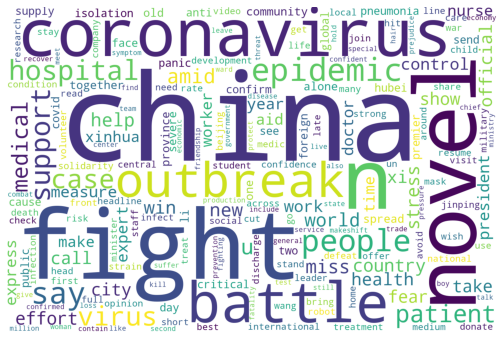

In [28]:
marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, china1L,"negemo" )
plot_wordcloud(marker_dict) #This is the wordcloud of the sum of the marker a words has got in each tweet is in

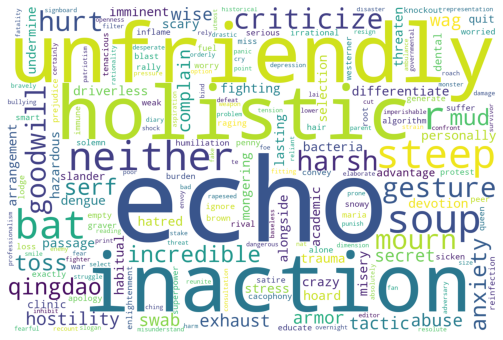

In [29]:
marker_freq = marker_dict.copy()
for word, value in marker_dict.items() : 
    marker_dict[word] = value / freq_dict[word]

plot_wordcloud(marker_dict) # This is the wordcloud of the average of the marker a words has got

In [30]:
A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

In [31]:
# Constructing the graph object from the adjacency matrix
G = nx.convert_matrix.from_numpy_array(A.to_numpy())
G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
print('is connected: ',nx.is_connected(G))

is connected:  True


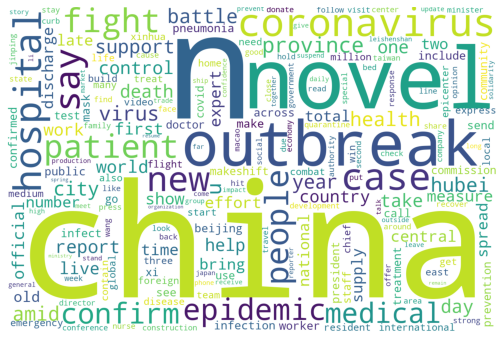

In [32]:
# Calculating the dummy pagerank on graph G
pr3 = nx.algorithms.pagerank(G)
pr3 = dict(sorted(pr3.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr3,0.003)
plot_wordcloud(pr3) #basic pagerank result

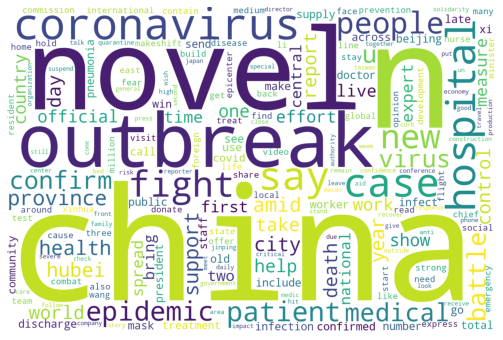

In [33]:
# Calculating the pagerank on graph G, using as weight for teleportation the average marker value
pr = nx.algorithms.pagerank(G,personalization=marker_dict)
pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr,0.003)
plot_wordcloud(pr) #This is the wordcloud of the result of pagerank giving the average marker dict as teleportation vector

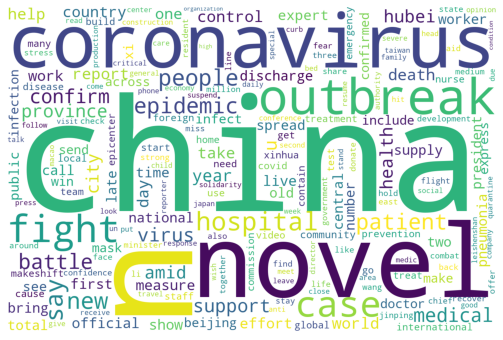

In [34]:
# Calculating the pagerank on graph G, using as weight for teleportation the frequency value
pr2 = nx.algorithms.pagerank(G,personalization=marker_freq)
pr2 = dict(sorted(pr2.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr2,0.003)
plot_wordcloud(pr2) # same as above but this time considering the total sum marker dict

In [35]:
'''
path= "../graph_data/china/"
filename = path +"edgelist.csv"
nx.write_weighted_edgelist(G, filename, delimiter=",")
#add header with appropriate column names
!sed --in-place 1i"Source,Target,Weight" ../graph_data/all_tweets/edgelist.csv

word_nodes = pd.DataFrame.from_dict(freq_dict,orient="index")
word_nodes.reset_index(inplace=True)
word_nodes["Label"] = word_nodes["index"]
word_nodes.rename(columns={"index":"Id",0:"delete"},inplace=True)
word_nodes = word_nodes.drop(columns=['delete'])
word_nodes.to_csv(path + 'nodelist.csv',index=False)

'''

'\npath= "../graph_data/china/"\nfilename = path +"edgelist.csv"\nnx.write_weighted_edgelist(G, filename, delimiter=",")\n#add header with appropriate column names\n!sed --in-place 1i"Source,Target,Weight" ../graph_data/all_tweets/edgelist.csv\n\nword_nodes = pd.DataFrame.from_dict(freq_dict,orient="index")\nword_nodes.reset_index(inplace=True)\nword_nodes["Label"] = word_nodes["index"]\nword_nodes.rename(columns={"index":"Id",0:"delete"},inplace=True)\nword_nodes = word_nodes.drop(columns=[\'delete\'])\nword_nodes.to_csv(path + \'nodelist.csv\',index=False)\n\n'

In [36]:
# all in a function 

def dummy_projections(df_text,df_marker, emo = "negemo", plotWC= True):
    cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
    marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, df_marker,emo )
    if plotWC== True :
        plot_wordcloud(marker_dict) #This is the wordcloud of the sum of the marker a words has got in each tweet is in

    marker_freq = marker_dict.copy()
    for word, value in marker_dict.items() : 
        marker_dict[word] = value / freq_dict[word]

    if plotWC== True :
        plot_wordcloud(marker_dict) # This is the wordcloud of the average of the marker a words has got

    A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

    # Constructing the graph object from the adjacency matrix
    G = nx.convert_matrix.from_numpy_array(A.to_numpy())
    G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
    print('is connected: ',nx.is_connected(G))

    # Calculating the pagerank on graph G, using as weight for teleportation the average marker value
    pr = nx.algorithms.pagerank(G,personalization=marker_dict)
    pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))
    #threshold(pr,0.003)

    if plotWC== True :
        plot_wordcloud(pr) #This is the wordcloud of the result of pagerank giving the average

    # Calculating the pagerank on graph G, using as weight for teleportation the frequency value
    pr2 = nx.algorithms.pagerank(G,personalization=marker_freq)
    pr2 = dict(sorted(pr2.items(), key=lambda item: item[1],reverse  = True))
    #threshold(pr2,0.003)
    if plotWC== True :
        plot_wordcloud(pr2) # same as above but this time considering the total sum marker dict
    
    return A, pr , pr2 

In [37]:
#B, pr_USA, pr2_USA = dummy_projections(americaTL["Source (B)"],americaTL, emo = "negemo", plotWC= True)

# PROJECTION (f) exploit $m̃_t$ in a PageRank-like context

In [38]:
# create the unnormalized adjency matrix B of the bipartite graph!!!

def unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet):   

    words = sorted(list(freq_dict.keys()))

    B = pd.DataFrame(np.zeros((len(cleaned_df_text),len(words))), columns = words, index = id_tweet )
    
    for i , phrase in enumerate(cleaned_df_text) :
        words_list = phrase.split()
        for w in words_list :
            
            B.loc[id_tweet.loc[i],w] = 1
    
    #B_tw_tw = pd.DataFrame(np.zeros((len(cleaned_df_text),len(cleaned_df_text))), columns = id_tweet, index = id_tweet )
    #B_w_w  =  pd.DataFrame(np.zeros((len(words),len(words))), columns = words, index = words )    
    return B

### china 1st period

In [39]:
df_text = china1L["Source (B)"]
id_tweet = china1L["Source (A)"].reset_index(drop=True)

cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, china1L,"negemo" )

B=unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet )

!!! notice that B is NOT the adjacency matrix of the bipartite graph , that would be : 


In [40]:
'''
............. 
  0  .  B  
    0.
.............
B.t  .0  
     .  0
.............
'''

'\n............. \n  0  .  B  \n    0.\n.............\nB.t  .0  \n     .  0\n.............\n'

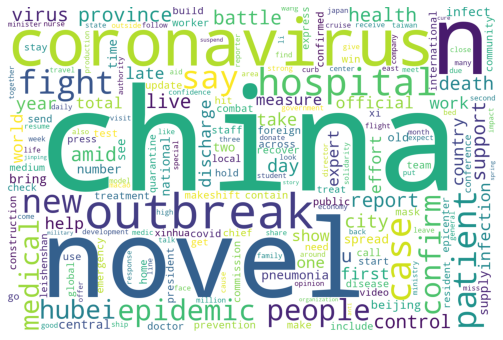

In [41]:
# from B we can retrieve the frequencies for instance : 
freq=np.sum(B).to_dict()
plot_wordcloud(freq) ##  check this,

### check for problematic tweets

In [42]:
B.sum(axis=1)

Source (A)
1231000383151116289    12.0
1230995615900934144    20.0
1230971490407010305    11.0
1230949059462037504    13.0
1230942170200276992    10.0
                       ... 
1220349820923273216     8.0
1220343345144352769    10.0
1220174533270933504     6.0
1220147584632852480    10.0
1219968312664301568     4.0
Length: 3198, dtype: float64

In [43]:
# check that tweets have at least one word
print(B.loc[B.sum(axis=1) == 0].index)
cleaned_df_text[1601] #here it is

#B.loc[B.loc[B.sum(axis=1) == 0].index]

Index(['1222512218052235264'], dtype='object', name='Source (A)')


''

In [44]:
# dump it
B.drop(B.loc[B.sum(axis=1) == 0].index, inplace=True, axis=0)

In [45]:
# check again
print(B.loc[B.sum(axis=1) == 0].index) # now its ok

Index([], dtype='object', name='Source (A)')


The tweet incriminated to have 0 word( in the cleaned text) is actually this : 

In [46]:
china1L.reset_index(drop=True).loc[1601] ['Source (B)'] 

'Hang on, #Wuhan â_x009d_¤ï¸_x008f_ https://t.co/I7l4c5kmCa'

In [47]:
#I drop it 
china1L=china1L.reset_index(drop=True)
china1L.drop(1601, inplace=True, axis=0)
#china1L

In [48]:
china1L.reset_index(drop=True).loc[1601] ['Source (B)'] 

" 'The story of the nurses at #Wuhan No.4 Hospital \\n\\nIn order to reduce the chance of infection, Xie Jingjing, a nurse at Wuhan No. 4 Hospital, bob the hair of the colleagues and herself. "

## compute B1 matrix ( row nurmalized version of B)

In [49]:
B1 = B / np.linalg.norm(B,ord=1,axis=1, keepdims=True)

In [50]:
B1.sum(axis=1)

Source (A)
1231000383151116289    1.0
1230995615900934144    1.0
1230971490407010305    1.0
1230949059462037504    1.0
1230942170200276992    1.0
                      ... 
1220349820923273216    1.0
1220343345144352769    1.0
1220174533270933504    1.0
1220147584632852480    1.0
1219968312664301568    1.0
Length: 3197, dtype: float64

## compute B2 matrix(column-normalised-and-transposed)

In [51]:
B2_tmp = B / np.linalg.norm(B,ord=1,axis=0, keepdims=True)
B2=B2_tmp.transpose()
B2

Source (A)  1231000383151116289  1230995615900934144  1230971490407010305  \
5g                          0.0                  0.0                  0.0   
abandon                     0.0                  0.0                  0.0   
ability                     0.0                  0.0                  0.0   
able                        0.0                  0.0                  0.0   
abnormal                    0.0                  0.0                  0.0   
...                         ...                  ...                  ...   
zero                        0.0                  0.0                  0.0   
zhejiang                    0.0                  0.0                  0.0   
zimbabwe                    0.0                  0.0                  0.0   
zone                        0.0                  0.0                  0.0   
zoo                         0.0                  0.0                  0.0   

Source (A)  1230949059462037504  1230942170200276992  1230942156816338945  \
5g                          0.0                  0.0                  0.0   
abandon                     0.0                  0.0                  0.0   
ability                     0.0                  0.0                  0.0   
able                        0.0                  0.0                  0.0   
abnormal                    0.0                  0.0                  0.0   
...                         ...                  ...                  ...   
zero                        0.0                  0.0                  0.0   
zhejiang                    0.0                  0.0                  0.0   
zimbabwe                    0.0                  0.0                  0.0   
zone                        0.0                  0.0                  0.0   
zoo                         0.0                  0.0                  0.0   

Source (A)  1230942063266537472  1230930184984875009  1230880182237450240  \
5g                          0.0                  0.0                  0.0   
abandon                     0.0                  0.0                  0.0   
ability                     0.0                  0.0                  0.0   
able                        0.0                  0.0                  0.0   
abnormal                    0.0                  0.0                  0.0   
...                         ...                  ...                  ...   
zero                        0.0                  0.0                  0.0   
zhejiang                    0.0                  0.0                  0.0   
zimbabwe                    0.0                  0.0                  0.0   
zone                        0.0                  0.0                  0.0   
zoo                         0.0                  0.0                  0.0   

Source (A)  1230873561344045057  ...  1223204744086188038  \
5g                          0.0  ...                  0.0   
abandon                     0.0  ...                  0.0   
ability                     0.0  ...                  0.0   
able                        0.0  ...                  0.0   
abnormal                    0.0  ...                  0.0   
...                         ...  ...                  ...   
zero                        0.0  ...                  0.0   
zhejiang                    0.0  ...                  0.0   
zimbabwe                    0.0  ...                  0.0   
zone                        0.0  ...                  0.0   
zoo                         0.0  ...                  0.0   

Source (A)  1223077869041016832  1221962289248718848  1221239982054105088  \
5g                          0.0                  0.0                  0.0   
abandon                     0.0                  0.0                  0.0   
ability                     0.0                  0.0                  0.0   
able                        0.0                  0.0                  0.0   
abnormal                    0.0                  0.0                  0.0   
...                         ..

## power iteration method to retrieve $\tilde{m}_t$  

In [52]:
Mt = B1.dot(B2) #Istarted with the transposed B!!! 
m_i = china1L["negemo"].reset_index(drop=True)

#np.delete(m_i, obj, axis=0)
#len(m_i)

In [53]:
def power_iteration(A, m_t0 ,num_simulations: int,alpha=0.85):
    '''
    A   : is the matrix of which you want the eigenvalue
    m_t0: is the starter value
    
    '''
    m_t=m_t0
    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        m_t1 = alpha * np.dot(A, m_t) + (1.-alpha)*m_t0
        
        # calculate the norm   (here I sum the whole vector and then I divide it)
        m_t1_norm = np.linalg.norm(m_t1,ord=1) 

        # re normalize the vector
        m_t = m_t1 / m_t1_norm #m_t1.sum()
        #print(m_t)

    return m_t

m_t=power_iteration(Mt,m_i, 10)
#np.isnan(m_i)[np.isnan(m_t) ==True]

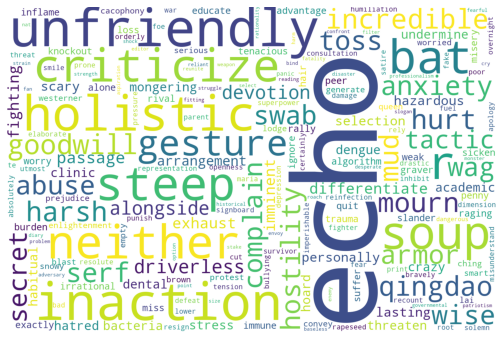

In [54]:
# let's compute mw : 
m_w =B2.dot(np.array(m_t))
plot_wordcloud(m_w.to_dict())

## Results for different time periods  USA

In [55]:
## let' s put it all in a function : 

# all in a function 

def pgrank_projection(df, emo = "negemo", n_iteration = 10, plotWC= True ):
    
    #check that the dataframe have no 0-words tweet
    check_df = len(df[df["WC"] == 0])
    if check_df != 0:
        print("dumping",check_df , "rows")
        df.drop(df[df["WC"] == 0].index, inplace=True, axis=0)  #notice it should affect the original df
        
    df_text = df["Source (B)"]
    id_tweet = df["Source (A)"].reset_index(drop=True)
    
    
    
    cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
    marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, df, emo )

    B=unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet )
    
    #spot difficulties in the dataframe : 
    #assert len(B.loc[B.sum(axis=1) == 0])== 0 , "Check the data !! Possible 0-word tweet!"
    check = B.loc[B.sum(axis=1) == 0]
    if len(check)!= 0  :  
        print(check.index)
        assert True, "Check the data !! Possible 0-word tweet!"
    
    
    B1 = B / np.linalg.norm(B,ord=1,axis=1, keepdims=True)
    
    B2_tmp = B / np.linalg.norm(B,ord=1,axis=0, keepdims=True)
    B2=B2_tmp.transpose()
    
    Mt = B1.dot(B2) #I started with the transposed B!!! 
    m_i = df[emo].reset_index(drop=True)
    
    m_t=power_iteration(Mt,m_i, n_iteration)
    m_w =B2.dot(np.array(m_t))
    if plotWC == True : plot_wordcloud(m_w.to_dict())
    
    return B, m_t , m_w 

### America, first period

dumping 1 rows


/home/ftrole/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


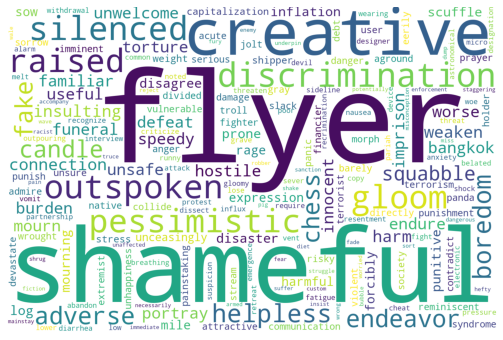

In [56]:
B_am1,m_t_a1,m_w_a1 = pgrank_projection(america1L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_a1_ord =dict(sorted(m_w_a1.to_dict().items(), key=lambda item: item[1],reverse  = True))

#### Out of context words analysis

In [57]:
with pd.option_context('display.max_colwidth', -1):
    display(america1L.loc[america1L['Source (B)'].str.contains("flyer", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("chess", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("shameful", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("creative", case=False)][['Source (B)']])


Source (B)
708   Coronavirus: Fake flyers in Los Angeles target Panda Express https://t.co/YCwBtk5fiA                                        
2319   'Fake flyers and face-mask fear: California fights #coronavirus discrimination                                             
2332   'Fake flyers and face-mask fear: California fights #coronavirus discrimination                                             
2342  Fake flyers and face-mask fear: California fights coronavirus discrimination https://t.co/kvXYEvAFiQ https://t.co/OSiXO2hp5J

Source (B)
2482   'Chess, squabbles aboard cruise ship cast away by coronavirus fears  
2491   'Chess, squabbles aboard cruise ship cast away by #coronavirus fears

Source (B)
0   "'Shameful'\n\nUkrainians attack a bus carrying 70 evacuees from China over the coronavirus outbreak

Source (B)
375  RT @AJEnglish: Quarantined Wuhan residents are getting creative with fighting boredom. https://t.co/rXatdgH9g1           
376  Quarantined Wuhan residents are getting creative with fighting boredom. https://t.co/rXatdgH9g1                          
377   'Wuhan residents are getting creative with how to fight the boredom of being under quarantine amid #CoronavirusOutbreak 
381   'Wuhan residents are getting creative with how to fight the boredom of being under quarantine amid #CoronavirusOutbreak

- Flyers: Fake flyers telling diners to avoid Asian-American restaurants because of the coronavirus are among a spate of recent racist incidents linked to the outbreak, say California authorities

#### they LIWC marker

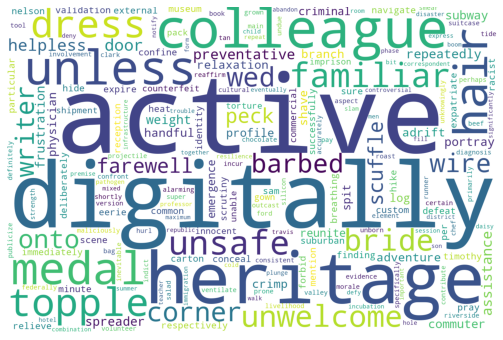

Source (B)
4615  RT @AJContrast: THREAD ðŸ‘‡\n\nWhat do you do when your memories from home are being erased?\n\nOur @ONA award-winning interactive project â€œLivingâ€¦                                                                                                          
5081   'Tens of millions of things undone, works of genius uncreated. A new AP interactive map of the coronavirusâ€™ spread â€” represented by the lives it has claimed â€” blends data and geography in a way that forces us to see what has happened. By @anthonyted 
5199   'Peruâ€™s heavy reliance on COVID-19 antibody tests to identify active infections is leading to confusion among patients and delays in getting treatment â€“ helping fuel one of the worldâ€™s deadliest coronavirus outbreaks.                                 
5388   'Australiaâ€™s second-largest city, Melbourne, has loosened lockdown restrictions as new and active COVID-19 continue to decline.                                                                                                                               
5447   'Peruâ€™s wide-scale use of rapid COVID-19 antibody tests to diagnose cases could be helping fuel one of the worldâ€™s worst outbreaks. The tests canâ€™t identify early, active infections â€“ leading to delays, confusion.                                   
6323   'The monthly number of suicides in the active duty Army since March, when the impact of the pandemic began to be felt, was above the five-year average of the monthly totals for the force.                                                                     
6525   'West Virginia Governor Jim Justice said at least 18 active Covid-19 outbreaks were traced to church services in the state                                                                                                                                      
6775   '"Audiences either don\'t help or actively hurt debates. Covid-19 has already forced a lot of negative changes on the world of politics. Why don\'t we let the virus create a positive change and gets rid of debate audiences forever?" writes @CillizzaCNN    
9010  'Active' fund managers beaten by benchmarks during COVID volatility https://t.co/pyQPz1joQt https://t.co/Yy8U41cmgR                                                                                                                                              
9030  RT @ReutersUK: Exclusive: Active travel is booming in Britain as millions of commuters, shoppers and schoolchildren get on their bikes to aâ€¦

In [58]:
pgrank_projection(america1L, emo = "they", n_iteration = 20, plotWC= True )
with pd.option_context('display.max_colwidth', -1):
    display(america2L.loc[america2L['Source (B)'].str.contains("active", case=False)][['Source (B)']])

### America, second period

In [59]:
america2L[america2L['Source (A)']== '1312041956084678656']["Source (B)"]
america2L.drop(america2L[america2L['Source (A)']== '1312041956084678656'].index, inplace=True, axis=0)

/home/ftrole/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
#don't plot the wordcloud
B_am2,m_t_a2,m_w_a2 = pgrank_projection(america2L, emo = "negemo", n_iteration = 20, plotWC= False )

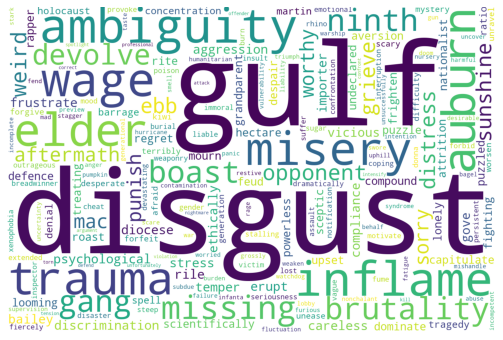

In [61]:
# fixing some words
m_w_a2_ord =dict(sorted(m_w_a2.to_dict().items(), key=lambda item: item[1],reverse  = True))
m_w_a2['wage'] = m_w_a2.pop('wag')
plot_wordcloud(m_w_a2)

#### Out of context words analysis

In [62]:
with pd.option_context('display.max_colwidth', -1):
    display(america2L.loc[america2L['Source (B)'].str.contains("gulf", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("inflam", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("disgust", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("ambigu", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("wag", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("auburn", case=False)][['Source (B)']])

Source (B)
6487   'Covid-19 has already killed more people in the US than Americans killed in battle during the five most recent wars combined:\n\nâ–ªï¸Ž the Korean War\nâ–ªï¸Ž the Vietnam War\nâ–ªï¸Ž the Iraq War\nâ–ªï¸Ž the War in Afghanistan\nâ–ªï¸Ž the Persian Gulf War

Source (B)
4738   '@WHO We have learned from other coronavirus and influenza epidemics that viral infections can trigger heart conditions due to inflammation.\n\nThis is caused by the infection and by the bodyâ€™s immune response to it - leading to cardiac disease 
6368   'In eight months, coronavirus has killed more one million people, exposed failures of governance, worsened healthcare inequality, and inflamed a long-waged war on the truth                                                                           
8467   'Doctors not involved in treating Trump said the fact that he has been started on dexamethasone â€“ a generic steroid widely used in other diseases to reduce inflammation â€“ is the strongest evidence yet that his case may be severe               
8680   "The FDA is broadening its probe into a serious illness tied to AstraZeneca's COVID-19 vaccine study in which a participant in Britain came down with what was believed to be a rare spinal inflammatory disorder                                      
8735  Oxford to study anti-inflammatory drug Humira as potential COVID-19 treatment https://t.co/Bw11ruJhHN https://t.co/mQlnc5tghE

Source (B)
6654   'The President\'s tweet saying, "Don\'t be afraid of Covid. Don\'t let it dominate your life," left many friends and families of Covid-19 victims disgusted and angered. 
6659   'The President\'s tweet saying, "Don\'t be afraid of Covid. Don\'t let it dominate your life," left many friends and families of Covid-19 victims disgusted and angered. 
6665   'The President\'s tweet saying, "Don\'t be afraid of Covid. Don\'t let it dominate your life," left many friends and families of Covid-19 victims disgusted and angered.

Source (B)
7153  U.S. warns China against Taiwan attack, stresses U.S. 'ambiguity' https://t.co/kNXfQ0Pk9T https://t.co/SjrVfTblNt
7156  U.S. warns China against Taiwan attack, stresses U.S. 'ambiguity' https://t.co/1CMZTsv6uY https://t.co/WEp5sp90fL
7158  U.S. warns China against Taiwan attack, stresses U.S. 'ambiguity' https://t.co/q2hdPQpzm0 https://t.co/j998adcjQD
7160  U.S. warns China against Taiwan attack, stresses U.S. 'ambiguity' https://t.co/Inrxa5T4vw https://t.co/w9zND2LjJR

Source (B)
6368    'In eight months, coronavirus has killed more one million people, exposed failures of governance, worsened healthcare inequality, and inflamed a long-waged war on the truth                                             
7320   Volkswagen, Chinese ventures to invest 15 billion euros in electric vehicles https://t.co/gyvCy4WGDf https://t.co/3bAW6LyLjm                                                                                              
7327   Volkswagen, Chinese ventures to invest 15 billion euros in electric vehicles https://t.co/9MUWAzGzXr https://t.co/X0brkf5YyP                                                                                              
7591   Taiwan president says has no plans to talk to Japan's new PM https://t.co/GZYC0WagDt https://t.co/v1duebJ9PO                                                                                                              
8205   Japan's household spending, real wages extend COVID-driven declines https://t.co/yq0t9M68D2 https://t.co/QbX1pCV6Jx                                                                                                       
8213   Japan's household spending, real wages extend COVID-driven declines https://t.co/eh7QCzLWBh https://t.co/bNQ3PUTvQX                                                                                                       
8535   Hungary PM agrees on big wage hike for doctors as COVID-19 cases rise https://t.co/iotJ9hmFj1 https://t.co/eFn9CizwDZ                                                                                                     
8542   Hungary PM agrees on big wage hike for doctors as COVID-19 cases rise https://t.co/RIA47Ibdic https://t.co/eytwMDNOJj                                                                                                     
9346   Five South Koreans die after getting flu shots, sparking vaccine fears https://t.co/uKJ4WagG4y https://t.co/7KkYkc1z10                                                                                                    
10721   'An estimated $3.5 trillion in wages were lost in the first nine months of 2020 due to stay-at-home orders and job losses, the U.N.â€™s International Labour Organization said                                           
10725   'Global workers have lost an estimated $3.5 trillion in wages during the first nine months of 2020 due to stay-at-home orders and job losses, according to an estimate by the U.N.â€™s International Labour Organization

Source (B)
5276   "In a Black community on Chicago's South Side, the triple tragedy of coronavirus, gun violence and economic misery has compounded anger and despair. Yet residents find hope looking beyond the trauma. See the story of Auburn Greshmam told by @AP journalists:

- 'wag' is 'wage' maybe something strange happens when pos/lemmatizing words, news mainly refer to the people who loose their job
- 'auburn' is a city where shootings happened in a university
- 'gulf' this one is not important
- 'ambiguity' mainly connected to tweets related to a possible attack to Taiwan performed by China, related to China-USA political relationship but not at all to covid

### third period, America

In [63]:
# don't plot
B_am3,m_t_a3,m_w_a3 = pgrank_projection(america3L, emo = "negemo", n_iteration = 20, plotWC= False )
m_w_a3_ord =dict(sorted(m_w_a3.to_dict().items(), key=lambda item: item[1],reverse  = True))

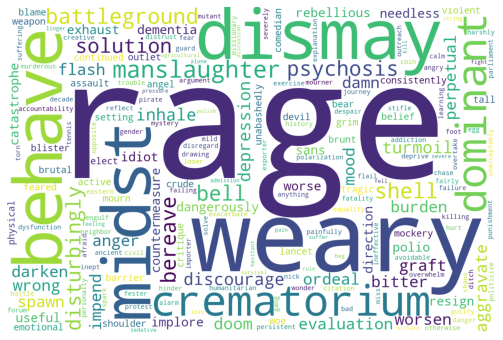

In [64]:
# fixing words
m_w_a3['rage'] = m_w_a3.pop('rag')
plot_wordcloud(m_w_a3)

#### Out of context words analysis

In [65]:
with pd.option_context('display.max_colwidth', -1):
    display(america3L.loc[america3L['Source (B)'].str.contains("weary", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains(" rag", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("dismay", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("midst", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("crematorium", case=False)][['Source (B)']])

Source (B)
11941   'Fears over potential fourth surge rise as White House sends warning to Covid-weary Americans. | Analysis by @StCollinson.

Source (B)
11727  The vaccine misinformation battle raging in France https://t.co/a0MlSSfAyi           
12270  Brazil's hospitals running out of sedatives as COVID-19 rages https://t.co/XwT18Ntkbh

Source (B)
11268  â€˜Helplessâ€™: Dismay as India delays vaccines to COVAX programme  https://t.co/J1cdeLRBsL

Source (B)
11102   'Top US health official warns of â€œimpending doomâ€_x009d_ as COVID-19 cases rise amidst vaccine rollout                           
11159  Brazil CEOs and economists blast Bolsonaroâ€™s COVID-19 response amidst soaring cases https://t.co/IBMXVXNQA1 https://t.co/PRNmE92H1h
12318   'Americas not behaving as if in midst of worsening COVID-19 crisis -regional health official warns

Source (B)
11192   "Strained beyond their capacity by overwhelming demand, California's crematorium workers reflect on the pandemicâ€™s physical and emotional toll.                                                               
11196   '"I just canâ€™t do this anymore. Iâ€™m exhausted.â€_x009d_\n\nStrained beyond their capacity by overwhelming demand, crematorium workers in California reflect on the pandemicâ€™s physical and emotional toll

- 'weary' synonim for tired: weary american because of the pandemic 
- 'rag' it is probably the prefix for rage, in italian "infuriare"
- "dismay" = sgomento

## Results for different time periods  China

### First period, China

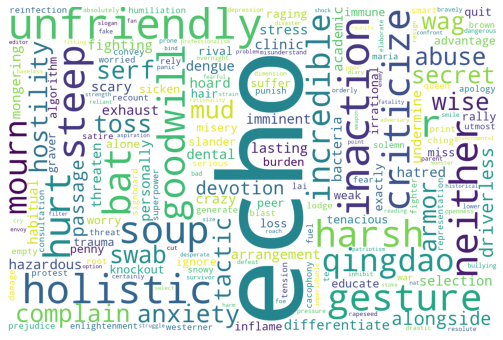

In [66]:
B_ch1,m_t_c1,m_w_c1 = pgrank_projection(china1L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c1_ord =dict(sorted(m_w_c1.to_dict().items(), key=lambda item: item[1],reverse  = True))

#### Out of context words

In [67]:
with pd.option_context('display.max_colwidth', -1):
    display(china1L.loc[china1L['Source (B)'].str.contains("unfriendly", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("soup", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("inaction", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("steep", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("holistic", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("echo", case=False)][['Source (B)']])


Source (B)
2398   '#DailyChinaBriefing on Feb. 1\n1. China criticizes "unfriendly U.S. comments" amid fight against novel #coronavirus epidemic                                                 
2401   'China criticizes "unfriendly U.S. comments" amid China\'s fight against novel #coronavirus outbreak, saying what the U.S. side did was "certainly not a gesture of goodwill"

Source (B)
2295   'Outbreak NEITHER caused by bat soup NOR created by biolab. Total of 146 confirmed novel #coronavirus cases outside China NOT those scary numbers on the Internet\nChinese people r risking their lives to #FightVirus Stop #infodemic that spreads fear &amp; hatred

Source (B)
1998   'China is waging two battles: fighting #coronavirus epidemic,  achieving economic and social development. No inaction is allowed in the battles

Source (B)
661  Steep losses in China stocks hit Asia as #virus fears grow https://t.co/2YsjvSiDOW

Source (B)
2670   'Two severe #coronavirus patients are discharged from hospital after receiving holistic treatment in Wuhan #FightVirus

Source (B)
2228   '#FightVirus! The battle call to fight novel #CoronaVirus is echoing all over the world. In the fight against virus, China is not alone!

- 'unfriendly': news about unfriendly US comments towards china 
- 'soup' and 'bat': covid doesn't com from bat soup or biolab, "Stop #infodemic that spreads fear"

#### they marker (apparently no valuable results)

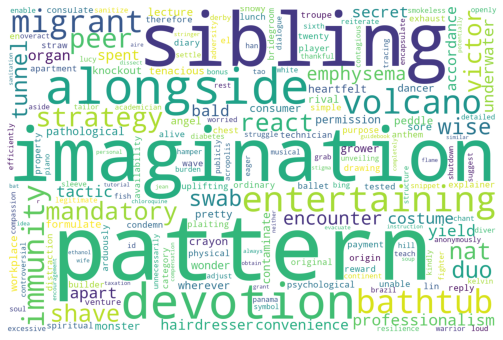

In [68]:
B_ch1,m_t_c1,m_w_c1 = pgrank_projection(china1L, emo = "they", n_iteration = 20, plotWC= True )
m_w_c1_ord =dict(sorted(m_w_c1.to_dict().items(), key=lambda item: item[1],reverse  = True))

In [69]:
with pd.option_context('display.max_colwidth', -1):
    display(china1L.loc[china1L['Source (B)'].str.contains("imagination", case=False)][['Source (B)']])  

Source (B)
1763   'Salvadoran kids send their love and support to China! Valeria, 13, and Javier, 11, are Salvadoran siblings who love to draw! They are using their imagination to show their support for China during the novel # coronavirus epidemic

### Second period, China

In [70]:
china2L[china2L['Source (A)']== '1316614782095482880']["Source (B)"]
china2L.drop(china2L[china2L['Source (A)']== '1316614782095482880'].index, inplace=True, axis=0)

/home/ftrole/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


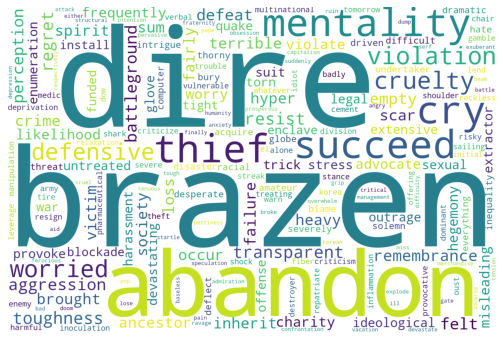

In [71]:
#B_ch2,m_t_c2,m_w_c2 = pgrank_projection(china2L, emo = "negemo", n_iteration = 20, plotWC= True )
#eliminate 'liability' and 'criminal', they appear to be out of context 
china2Lcleaned=china2L.drop(china2L[china2L['Source (B)'].str.contains('criminal', case=False)].index, inplace=False, axis=0)
B_ch2,m_t_c2,m_w_c2 = pgrank_projection(china2Lcleaned, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c2_ord =dict(sorted(m_w_c2.to_dict().items(), key=lambda item: item[1],reverse  = True))

#### Out of context words analysis

In [72]:
with pd.option_context('display.max_colwidth', -1):
    display(china2L.loc[china2L['Source (B)'].str.contains("brazen", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains(" dire ", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("abandon", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("thief", case=False)][['Source (B)']])


Source (B)
19507   "Opinion: Pompeo and his brazen China lies, a dire threat to global stability

Source (B)
19507   "Opinion: Pompeo and his brazen China lies, a dire threat to global stability

Source (B)
17757  China slams Pompeo's accusations, urges U.S. to abandon Cold War mentality\nhttps://t.co/e0Tq5VRwxB

Source (B)
17390   'The Chinese Foreign Ministry on Monday said #Taiwan is playing the trick of a thief crying "stop thief," and stressed that any attempt to use the Taiwan issue to provoke ties between China and Pacific island countries will not succeed

- first 3 words are related to Pompeo: china accused him and america of trying to stop china development. Unrelated to covid 
- 'thief' relationship between chna and taiwan



### Third period, China

In [73]:
china3L[china3L['Source (A)']== '1372064322671669248']["Source (B)"]
china3L.drop(china3L[china3L['Source (A)']== '1372064322671669248'].index, inplace=True, axis=0)

/home/ftrole/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


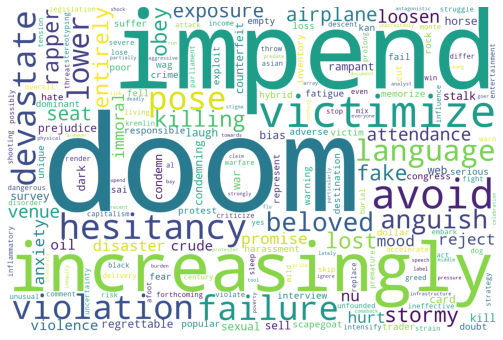

In [74]:
B_ch3,m_t_c3,m_w_c3 = pgrank_projection(china3L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c3_ord =dict(sorted(m_w_c3.to_dict().items(), key=lambda item: item[1],reverse  = True))

#### Out of context words analysis

In [75]:

with pd.option_context('display.max_colwidth', -1):
    display(china3L.loc[china3L['Source (B)'].str.contains("doom", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("impend", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("victimiz", case=False)][['Source (B)']])


Source (B)
21142   'HeadlinesWatch:\nU.S CDC director warns of "impending doom": CNN

Source (B)
21142   'HeadlinesWatch:\nU.S CDC director warns of "impending doom": CNN

Source (B)
20366  RT @cgtnamerica: Asian Americans are increasingly finding themselves victimized by violence  during COVID-19 pandemic.  See the disturbingâ€¦

- 'victimise' Asian Americans are increasingly finding themselves victimized by violence during COVID-19 pandemic. See the disturbing

#  positive emotion :

### First period, China

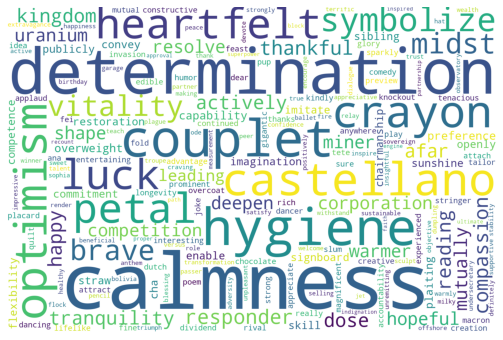

In [76]:
B_ch1p,m_t_c1p,m_w_c1p = pgrank_projection(china1L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_c1_ordp =sorted(m_w_c1p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [77]:
m_w_c1_ordp[1:10]

[('determination', 0.004453424960729848),
 ('couplet', 0.0028499422933029547),
 ('hygiene', 0.0028207623910251048),
 ('castellano', 0.0025457242607997343),
 ('optimism', 0.0024811029229872238),
 ('crayon', 0.00243012559571256),
 ('heartfelt', 0.00243012559571256),
 ('luck', 0.002406663270413432),
 ('petal', 0.002406663270413432)]

#### Out of context words

In [78]:
with pd.option_context('display.max_colwidth', -1):
    display(china1L.loc[china1L['Source (B)'].str.contains("castellano", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("couplet", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("optimism", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("petal", case=False)][['Source (B)']])
    display(china1L.loc[china1L['Source (B)'].str.contains("heartfelt", case=False)][['Source (B)']])


Source (B)
2120   'Valeria Castellano and Javier Castellano, thank you for your words of encouragement and support, really appreciated.\nWe believe China will be able to ride out the current difficulties.

Source (B)
2616   'Writing new year blessings and couplets to welcome Chinese Lunar New Year. See how people around the world celebrate the most important festival in China

Source (B)
222   "Doctor's got talent!\n\nA doctor from NW China's Xinjiang at a makeshift hospital in #Wuhan was asked by patients with mild #coronavirus symptoms to teach them a traditional Uygur dance, bringing optimism and fun to the hospital #COVID19 
842  #Coronavirus patients display optimism through dancing https://t.co/bj3gM6r0u6                                                                                                                                                                  
950   'Patients at makeshift hospitals show optimism, calmness and strong determination despite #CoronavirusOutbreak

Source (B)
159   "Plum blossom is highly appreciated in Chinese culture. The five petals symbolize happiness, good luck, longevity, and peaceðŸŒº\n\nIn Mount Huangshan, east China's Anhui Province, the plum trees have already started to blossom attracting many birds.

Source (B)
1684   'â€œWe support you, China!â€_x009d_ Venezuelan kids express their heartfelt support for Chinese people with paper, crayons, and colored pencils

- 'castellano', 'heartfelt': news aboutsupport from other countries

### Second period, China

In [79]:
#china2L[china2L['Source (A)']== '1316614782095482880']["Source (B)"]
#china2L.drop(china2L[china2L['Source (A)']== '1316614782095482880'].index, inplace=True, axis=0)

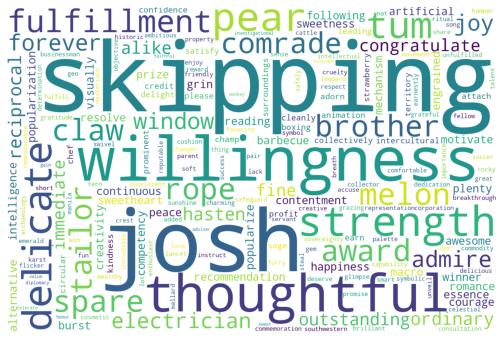

In [80]:
#B_ch2,m_t_c2,m_w_c2 = pgrank_projection(china2L, emo = "negemo", n_iteration = 20, plotWC= True )
#eliminate 'liability' and 'criminal', they appear to be out of context 
china2Lcleaned=china2L.drop(china2L[china2L['Source (B)'].str.contains('criminal', case=False)].index, inplace=False, axis=0)
B_ch2p,m_t_c2p,m_w_c2p = pgrank_projection(china2Lcleaned, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_c2_ordp =sorted(m_w_c2p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [81]:
m_w_c2_ordp[0:10]

[('skipping', 0.00452504705074487),
 ('josh', 0.0035021924226132806),
 ('willingness', 0.003194278648779887),
 ('thoughtful', 0.003148002170068167),
 ('strength', 0.003085330566913556),
 ('delicate', 0.00285828320663213),
 ('pear', 0.00285828320663213),
 ('tum', 0.0024692909469039774),
 ('fulfillment', 0.0024145042977270223),
 ('melon', 0.0023350982488102505)]

#### Out of context words analysis

In [82]:
with pd.option_context('display.max_colwidth', -1):
    display(china2L.loc[china2L['Source (B)'].str.contains("skipping", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains(" josh ", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("pear", case=False)][['Source (B)']])
    display(china2L.loc[china2L['Source (B)'].str.contains("tum", case=False)][['Source (B)']])


Source (B)
19078   'Strength and confidence! Visually impaired children gain confidence and joy through rope skipping in E China

Source (B)
19237   '"China is a great country that deserves our deep respect," Josh Selig, award-winning U.S. animation producer, shares 10 things about his love of China. Take a glimpse of his list

Source (B)
17610  Stunning winter scenery appears with N #China's first snow https://t.co/Vf8M5NFeGX                                                                                                                                                                             
17773   "First outdoor adventure!ðŸ¯\n\nA two-month-old baby Bengal tiger made his first public appearance and greeted tourists in SW China's Chongqing.                                                                                                             
17816  Live: Enjoy the delicate sweetness of pear feast in China's 'Pear City' Korla #amazingxinjiang https://t.co/LgSHxaaAOL                                                                                                                                         
17852  Live: Join a night cruise on south China's Zhujiang (Pearl) River #HighSpeedRailTour https://t.co/WStYDSRaJP                                                                                                                                                   
18227  RT @cgtnamerica: The First Lady of the U.S. Melania Trump canceled her campaign appearance scheduled in Pennsylvania for Tuesday night, asâ€¦                                                                                                                  
18734   'The Iraqi Health Ministry on Sunday reported 3,438 new COVID-19 cases, as the health authorities banned the entry of foreign travelers into the country amid the appearance of new strains of the coronavirus in the neighboring countries. (Xinhua)         
18966   "Using new technology to preserve the past! Digital tech helped restore the original appearance of a 1,300-year-old damaged Buddha statue in the Longmen Grottoes, a world cultural heritage site in central China's Henan Province. Check out how here:      
19028   "The stunning autumn scenery appears in Minqin County, once a desert area, in northwest China's Gansu Province. #EnvironmentalProtection                                                                                                                      
19779   "As @UN celebrates its 75th anniversary, Xi is to appear once again on the most prestigious int'l platform, attending virtual UN high-level meetings and presenting China's answers to fundamental questions hanging over the world. Read Feature:            
19845   'Trump, who tested positive for #COVID19 on Oct. 1, is "no longer considered a transmission risk to others," his doctor says.\n"I\'m feeling great," says the president after being medically cleared, while declaring COVID-19 is "disappearing" in the U.S.

Source (B)
17392   "Autumn on the Great Wall.\n\nSections of the magnificent Great Wall are pictured in N China's Beijing City and Hebei Province.                                                                                                            
17423  Largest inland freshwater lake in #China embraces autumn https://t.co/dr3hXKMVnp                                                                                                                                                            
17491  In pictures: Autumn sceneries across #China https://t.co/JKSARwEmaN https://t.co/vrp8IxoY3N                                                                                                                                                 
17521   "In pics: A flock of sheep stroll through the mountains decorated by fiery-red autumn leaves in Dandong, northeast #China's Liaoning Province.                                                                                             
17702   "A golden autumn scenery pictured in northwest #China's forest of populus euphratica, commonly known as desert poplar in Jiuquan City, Gansu Province #ICYMI                                                                               
...                                                                                                                                                               ...                                                                              
19626   "China's nucleic acid testing capacity has hugely improved, which is the key to the epidemic response in the coming autumn-winter season, a health official said                                                                           
19679   "Dancing is a universal language. Here's a story about a foreign dancer in Shanghai, who literally stumbled into China and choreographed the act of her dance career in the country.                                                       
19711   'With traditional Chinese food, photo exhibition and a beautiful Chinese song, the China Cultural Center in Fiji shared the joy of celebrating Chinese Mid-Autumn Festival with a group of Fijians. #MidAutumnFestival                     
19712   'High school students from the Scots College school in New Zealand make moon cakes to celebrate the #MidAutumnFestival as part of the "Moment We Share" activities launched by the China Cultural Center in Wellington                     
19713   "Autumn is just around the corner, and in China, that means its crab season! One of the most sought-after freshwater crabs is the mitten crab, and on Monday, collection began at Yangcheng Lake in Suzhou, east China's Jiangsu Province. 

[79 rows x 1 columns]

- first 4 words are not related to covid, except maybe for skipping ? 




### Third period, China

In [83]:
#china3L[china3L['Source (A)']== '1372064322671669248']["Source (B)"]
#china3L.drop(china3L[china3L['Source (A)']== '1372064322671669248'].index, inplace=True, axis=0)

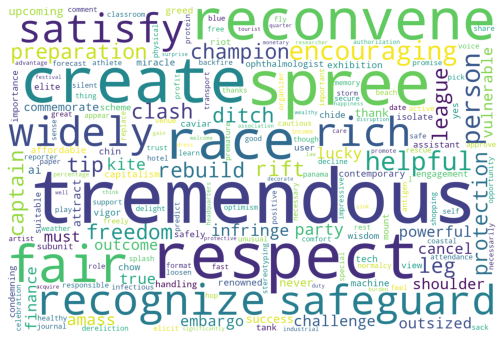

In [84]:
B_ch3p,m_t_c3p,m_w_c3p = pgrank_projection(china3L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_c3_ordp =sorted(m_w_c3p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [85]:
m_w_c3_ordp[0:10]

[('tremendous', 0.012869303086779544),
 ('respect', 0.009079241917948832),
 ('create', 0.008926272894620052),
 ('spree', 0.008581465290877447),
 ('reconvene', 0.008270310492847134),
 ('race', 0.007534431600799479),
 ('fair', 0.00661893272446101),
 ('recognize', 0.00661893272446101),
 ('safeguard', 0.00661893272446101),
 ('widely', 0.00661893272446101)]

#### Out of context words analysis

In [86]:

with pd.option_context('display.max_colwidth', -1):
    display(china3L.loc[china3L['Source (B)'].str.contains("tremendous", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("spree", case=False)][['Source (B)']])
    display(china3L.loc[china3L['Source (B)'].str.contains("race", case=False)][['Source (B)']])


Source (B)
20087  RT @cgtnamerica: The pandemic has created tremendous challenges for Brazilâ€™s health care system. So the state of Sao Paulo created a â€˜Volunâ€¦

Source (B)
21097  In a vaccine shopping spree, the rich world is having a good pandemic. https://t.co/aEvWHFbBHI

Source (B)
20966   'A group of 20 tourist guides in South Africa is learning mandarin to brace for incoming Chinese tourists as the COVID-19 pandemic is easing in the country                                                                                                      
21095   '"I think Chinese vaccines are good for all people, and so we trust this vaccine. We support our country\'s cooperation with China," says a Serbian.\n#XinhuaHeadlines: Trust in Chinese vaccines gives European countries head start in global inoculation race

# positive emotion America

### America, first period

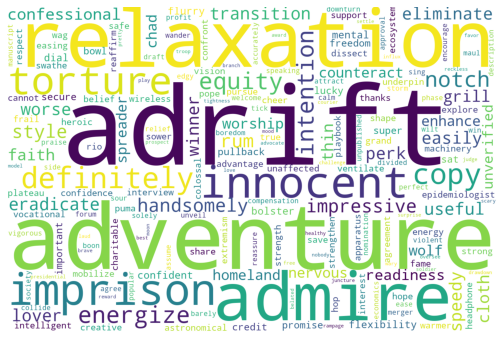

In [87]:
B_am1p,m_t_a1p,m_w_a1p = pgrank_projection(america1L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_a1_ordp =sorted(m_w_a1p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [88]:
m_w_a1_ordp[0:10]

[('adrift', 0.005899782891708841),
 ('adventure', 0.005899782891708841),
 ('relaxation', 0.005899782891708841),
 ('admire', 0.004425740147921669),
 ('imprison', 0.003752821724672581),
 ('innocent', 0.003752821724672581),
 ('torture', 0.003752821724672581),
 ('definitely', 0.003686926617574844),
 ('copy', 0.00359596561274867),
 ('energize', 0.0035734906728325834)]

#### Out of context words analysis

In [89]:
with pd.option_context('display.max_colwidth', -1):
    display(america1L.loc[america1L['Source (B)'].str.contains("adrift", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("relaxation", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("admire", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("imprison", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("innocent", case=False)][['Source (B)']])
    display(america1L.loc[america1L['Source (B)'].str.contains("torture", case=False)][['Source (B)']])



Source (B)
426  RT @APBusiness: Adrift: People expecting relaxation or adventure when they signed up for cruises through Asia definitely got an adventure,â€¦

Source (B)
426  RT @APBusiness: Adrift: People expecting relaxation or adventure when they signed up for cruises through Asia definitely got an adventure,â€¦

Source (B)
1787   'Why Singaporeâ€™s admired coronavirus-fighting playbook cannot be easily copied in other countries 
1817   'Why Singaporeâ€™s admired coronavirus-fighting playbook cannot be easily copied in other countries

Source (B)
241   '"Before the coronavirus spread, putting the freedom, health and wellbeing of innocent people at risk, millions of innocent Uighurs were already being imprisoned, tortured and killed - because they had the "virus" of Islam."

Source (B)
241   '"Before the coronavirus spread, putting the freedom, health and wellbeing of innocent people at risk, millions of innocent Uighurs were already being imprisoned, tortured and killed - because they had the "virus" of Islam."

Source (B)
241   '"Before the coronavirus spread, putting the freedom, health and wellbeing of innocent people at risk, millions of innocent Uighurs were already being imprisoned, tortured and killed - because they had the "virus" of Islam."

- does not seem very positive

### America, second period

In [90]:
#america2L[america2L['Source (A)']== '1312041956084678656']["Source (B)"]
#america2L.drop(america2L[america2L['Source (A)']== '1312041956084678656'].index, inplace=True, axis=0)

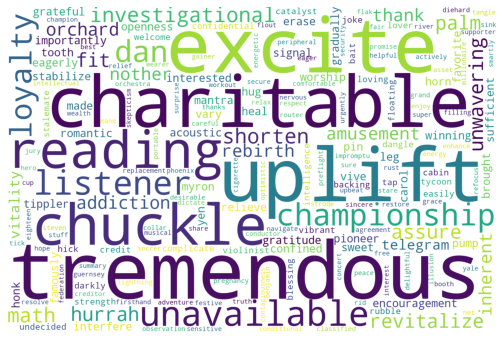

In [91]:
B_am2p,m_t_a2p,m_w_a2p = pgrank_projection(america2L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_a2_ordp =sorted(m_w_a2p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [92]:
m_w_a2_ordp[0:10]

[('tremendous', 0.0017875137724423424),
 ('excite', 0.0016177423668651935),
 ('uplift', 0.0015441912346052748),
 ('charitable', 0.001415224382354467),
 ('chuckle', 0.001415224382354467),
 ('reading', 0.001415224382354467),
 ('unavailable', 0.0014151118548138511),
 ('listener', 0.0012824345549385676),
 ('championship', 0.0012577758180952465),
 ('dan', 0.0012351065521657347)]

#### Out of context words analysis

In [93]:
with pd.option_context('display.max_colwidth', -1):
    display(america2L.loc[america2L['Source (B)'].str.contains("tremendous", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("uplift", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("charitable", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("chuckle", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("reading", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("unavailable", case=False)][['Source (B)']])
    display(america2L.loc[america2L['Source (B)'].str.contains("dan", case=False)][['Source (B)']])

Source (B)
6751   '"I want to thank everybody for the tremendous support"\n\nIn his first tweet since announcing he had tested positive for Covid-19, President Trump shared words of thanks and encouragement during a short 18-second long video.

Source (B)
4977   "Can Trump really take credit for America's pre-COVID-19 strength? Did his policies really uplift all Americans? The truth, explained ðŸ‘‰

Source (B)
6583   '"There\'s really no charitable reading possible for McConnell\'s chuckling at a debate over the question of Covid relief," writes @JillFilipovic for @CNNOpinion 
6586   '"There\'s really no charitable reading possible for McConnell\'s chuckling at a debate over the question of Covid relief," writes @JillFilipovic for @CNNOpinion

Empty DataFrame
Columns: [Source (B)]
Index: []

Source (B)
4655   China accused Trump of spreading a "political virus" at the 75th #UNGA https://t.co/NyIOdBdXvk https://t.co/if432bPjY7                                                                                                                                                        
5351   RT @AP_Europe: Swiss authorities put 2,500 university students under quarantine in Lausanne, say coronavirus is spreading too fast to do anâ€¦                                                                                                                                
5938    'The lowest risk for contracting or spreading the highly infectious coronavirus is simply celebrating Thanksgiving in your own home with members of your household and/or virtually with extended family, the CDC says.                                                      
6160    'Going into some New York City courthouses that have begun to resume in-person activity poses "an unacceptably high risk" of spreading Covid-19 because of issues with crowding, ventilation and improper use of masks, according to a third-party report.                   
6236    "President Trump is currently at Walter Reed National Military Medical Center after announcing that he had tested positive for Covid-19.\n\nIf you're just reading in now, here's a recap of the latest developments.                                                        
6545    'â€œItâ€™s really spreading quite quickly â€¦ A large gathering is just not recommended at this time,â€_x009d_ Wisconsin infectious disease specialist Dr. Michael Landrum says as Covid-19 cases surge in the state and President Trump is set to hold a rally there today. 
6583    '"There\'s really no charitable reading possible for McConnell\'s chuckling at a debate over the question of Covid relief," writes @JillFilipovic for @CNNOpinion                                                                                                            
6586    '"There\'s really no charitable reading possible for McConnell\'s chuckling at a debate over the question of Covid relief," writes @JillFilipovic for @CNNOpinion                                                                                                            
7484    'U.S.-China tensions took center stage at the U.N. General Assembly, held virtually for the first time, with President Trump blaming China for COVID-19 spreading around the world                                                                                           
8044   RT @ReutersUK: Prime Minister Boris Johnsonâ€™s government needs to impose further COVID-19 restrictions and the risk of spreading the virusâ€¦                                                                                                                               
9038    'Prime Minister Boris Johnson told the British people to work from home where possible and ordered restaurants and bars to close early to tackle a fast-spreading second wave of COVID-19                                                                                    
9043    'British Prime Minister Boris Johnson told people to work from home where possible and ordered bars and restaurants to close early to tackle a fast-spreading second wave of COVID-19 with restrictions lasting probably six months                                          
9956   Coronavirus lit fuse in Kyrgyzstan, spreading unrest in Putin's back yard https://t.co/ev0NjL6b8m https://t.co/4a2YmyKSM4                                                                                                                                                     
10082   'A member of the Dallas Young Republicans was isolating at home to avoid potentially spreading the coronavirus after his exposure to President Trump who tested positive last week, a day after the donorsâ€™ event                                                          
10095  Mid-recovery, coronavirus spreading, global central bankers take stock https://t.co/0d067K

Source (B)
4710   "President Trump declares his diagnosis with COVID-19 was â€œa blessing from Godâ€_x009d_ and promises to make currently unavailable experimental drugs 'free'

Source (B)
4705   Jordan enters 48-hour nationwide coronavirus lockdown https://t.co/CM3DM9t0Ad https://t.co/3Qpd76KBC0                                                                                                                                                             
4860    'Jordanâ€™s King Abdullah II and Prime Minister Bisher al-Khaswaneh swore in a new government that face an uphill battle to revive an economy weakened by COVID-19                                                                                               
4984    "Deep sea fishing is one of the world's most dangerous jobs. Due to COVID-19, restrictions are making it harder than ever to get remains sent to families                                                                                                        
5182    'The World Food Program has won the Nobel Peace Prize for its efforts to combat hunger amid the coronavirus pandemic. From Yemen to South Sudan, last year alone the organization provided aid to almost 100 million people in 88 countries.                     
5222    'The CDC, in new guidance, says the coronavirus can spread more than 6 feet through the air. But the agency maintains such spread is rare and current social distancing guidelines still make sense. Some experts, though, suggest stricter rules may be needed. 
...                                                                                                                                                                                                                                                                   ...
10809   'The CDC took down its guidance warning on possible airborne coronavirus transmission, which recommended that people use air purifiers, saying the draft was posted in error                                                                                     
10834   'British violinist Daniel Hope has given a concert with a difference: he performed on a floating stage on the Vltava river in the center of Prague, bringing some welcome musical relief                                                                         
10839  British violinist Daniel Hope performed on a floating stage on the Vltava river in Prague https://t.co/i3xlyUeop6 https://t.co/Wb9jn60Bog                                                                                                                         
10847  UK violinist Daniel Hope serenades Czechs from a floating stage on the river Vltava https://t.co/i3xlyTWNxy https://t.co/xZsJUbKjq0                                                                                                                               
10854   "Britain's violinist Daniel Hope played on a floating stage in Prague, bringing live music to his listeners                                                                                                                                                      

[114 rows x 1 columns]

### third period, America

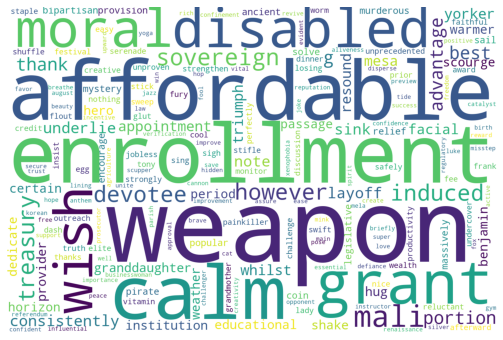

In [94]:
B_am3p,m_t_a3p,m_w_a3p = pgrank_projection(america3L, emo = "posemo", n_iteration = 20, plotWC= True )
m_w_a3_ordp =sorted(m_w_a3p.to_dict().items(), key=lambda item: item[1],reverse  = True)

In [95]:
m_w_a3_ordp[0:10]

[('weapon', 0.007356942024991344),
 ('affordable', 0.00474743917489725),
 ('enrollment', 0.00474743917489725),
 ('calm', 0.003923146949968345),
 ('grant', 0.0037748939278314164),
 ('disabled', 0.0033965719837586767),
 ('moral', 0.003270026333264149),
 ('wish', 0.003270026333264149),
 ('mali', 0.0029436577471565186),
 ('sovereign', 0.0029436577471565186)]

#### Out of context words analysis

In [96]:
with pd.option_context('display.max_colwidth', -1):
    display(america3L.loc[america3L['Source (B)'].str.contains("weapon", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains(" affordable", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("enrollment", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("calm", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("grant", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("disabled", case=False)][['Source (B)']])
    display(america3L.loc[america3L['Source (B)'].str.contains("moral", case=False)][['Source (B)']])


Source (B)
11000  Amnesty denounces world leaders for weaponising the COVID-19 pandemic to ramp up their assault on basic rights ðŸ‘‡ https://t.co/J3TPIozNjo                                                                                              
11048  â€˜Weaponisedâ€™ COVID restrictions stifle Hong Kongâ€™s freedom https://t.co/jVcOBzA8nd https://t.co/9XB7b640dI                                                                                                                         
11049  â€˜Weaponisedâ€™ COVID restrictions stifle Hong Kongâ€™s freedom  https://t.co/JfIXoYNnhg                                                                                                                                                
12047   'The dark web is a part of the internet not detected by search engines where cybercriminals often sell and buy illicit materials, from credit card numbers and drugs to cyberweapons and now, apparently, coronavirus-related products. 
14016   "Mass vaccination is Brazil's best weapon against virus, economic challenges: Treasury secretary

Source (B)
12041   'The Affordable Care Act special enrollment period will be extended by three months to August 15, allowing Americans more time to take advantage of benefits granted through the Covid relief law

Source (B)
12041   'The Affordable Care Act special enrollment period will be extended by three months to August 15, allowing Americans more time to take advantage of benefits granted through the Covid relief law

Source (B)
11639  German Covid Easter U-turn shakes Merkel's cool, calm image https://t.co/YuGZ2x4ccR

Source (B)
10900   'Migrant workers pile into rail stations in Indiaâ€™s Mumbai to head back to their home villages after COVID curbs                                                                                                                                                        
10944  RT @AJEnglish: Human rights groups are warning many refugees and migrant workers are being left out of Lebanonâ€™s COVID vaccine programme. Tâ€¦                                                                                                                           
10949   'Human rights groups are warning many refugees and migrant workers are being left out of Lebanonâ€™s COVID vaccine programme. The rollout is in its third month.                                                                                                          
11328  RT @AP_Europe: Bosnian authorities worry about outbreaks of COVID-19 among the more than 6,000 refugees and other migrants living in camps.â€¦                                                                                                                             
11426   "Weekend reads: \nâ€¢ A migrant dad faces charges after losing his only child. \nâ€¢ NYC courthouses adapt to COVID as trials return.\nâ€¢ Confusion reigns over Biden policies amid border surge.\nâ€¢ Will work from home outlast the virus? Ford's move suggests yes.\n
11444  RT @AP_Europe: Community activists armed with language skills are reaching out in a Berlin immigrant neighborhood, hoping to raise awarenesâ€¦                                                                                                                             
11801   'The Biden administration is wrestling with a massive backlog of nearly 2.6 million immigrant visa applications, caused by restrictions from Trump policies and the Covid-19 pandemic.                                                                                    
12000   'More than 500 unaccompanied migrant children currently held in US government shelters have tested positive for Covid-19, federal officials said                                                                                                                          
12041   'The Affordable Care Act special enrollment period will be extended by three months to August 15, allowing Americans more time to take advantage of benefits granted through the Covid relief law                                                                         
12091   "Federal regulators said they won't extend a Covid relief provision granted to big banks, dashing Wall Street's hopes for an extension

Source (B)
11407  RT @AP_Politics: Advocates for the elderly and the disabled hope $12 billion in the COVID-19 relief law speeds the shift to care in everydaâ€¦

Source (B)
11881   'President Joe Biden and first lady Jill Biden shared well-wishes with Americans celebrating Easter and encouraged them to get Covid-19 vaccinations as a moral obligation 
13111  French consumer morale unexpectedly strong in March despite COVID-19 curbs https://t.co/TT5t6ij5UE https://t.co/mhXAXrlvsS

does not seem very positive emotions